In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
import random
import plotly.express as px

C:\Users\Edward Papiev\AppData\Local\Temp\ipykernel_12540\1988030337.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Data cleaning and importing data from yFinance
tickers = ['NVDA','AMD', 'BAC', 'ECL', 'GOOG', 'MSFT', 'NVO', 'QQQ', '^GSPC', 'WMT']
data = yf.download(tickers, period = '15y')
infodf = pd.DataFrame(data)
infodf.drop(infodf.columns[10:], axis = 1, inplace = True)
infodf.droplevel(level = 0, axis = 1)

[*********************100%%**********************]  10 of 10 completed


Ticker,AMD,BAC,ECL,GOOG,MSFT,NVDA,NVO,QQQ,WMT,^GSPC
Date,,,,,,,,,,
2009-07-10,3.490000,9.530005,31.356840,10.309581,16.751822,0.237791,4.082833,30.512978,11.415244,879.130005
2009-07-13,3.560000,10.420434,31.978765,10.555877,17.380289,0.240543,4.105723,31.098438,11.477633,901.049988
2009-07-14,3.550000,10.356259,31.726643,10.565580,17.290514,0.245587,4.135481,31.212013,11.549624,905.840027
2009-07-15,3.860000,10.765379,31.869514,10.900940,18.046177,0.255677,4.183549,32.260563,11.650412,932.679993
2009-07-16,3.920000,10.564831,32.012383,11.011150,18.285589,0.268977,4.279689,32.645027,11.640811,940.739990
...,...,...,...,...,...,...,...,...,...,...
2024-07-02,164.309998,40.930000,235.649994,186.610001,459.279999,122.669998,142.979996,486.980011,68.070000,5509.009766
2024-07-03,163.899994,40.900002,235.850006,187.389999,460.769989,128.279999,138.869995,491.040009,68.239998,5537.020020
2024-07-05,171.899994,40.410000,238.190002,191.960007,467.559998,125.830002,142.369995,496.160004,70.040001,5567.189941


In [3]:
#Random Weight Generator
n = len(tickers)
def rweights(n):
    weights = []
    for i in range(n):
        weights.append(random.random())
    weights = weights / np.sum(weights)
    return weights

In [4]:
#Scale said dataframe from one
def scaler(df):
    scaled = (df / df.iloc[0]).droplevel(level = 0, axis = 1)
    return scaled
scaler(infodf)

Ticker,AMD,BAC,ECL,GOOG,MSFT,NVDA,NVO,QQQ,WMT,^GSPC
Date,,,,,,,,,,
2009-07-10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2009-07-13,1.020057,1.093434,1.019834,1.023890,1.037516,1.011572,1.005607,1.019187,1.005465,1.024934
2009-07-14,1.017192,1.086700,1.011793,1.024831,1.032157,1.032787,1.012895,1.022909,1.011772,1.030382
2009-07-15,1.106017,1.129630,1.016350,1.057360,1.077267,1.075217,1.024668,1.057274,1.020601,1.060912
2009-07-16,1.123209,1.108586,1.020906,1.068050,1.091558,1.131148,1.048216,1.069874,1.019760,1.070081
...,...,...,...,...,...,...,...,...,...,...
2024-07-02,47.080228,4.294856,7.515107,18.100639,27.416720,515.873171,35.019802,15.959767,5.963079,6.266434
2024-07-03,46.962749,4.291708,7.521485,18.176297,27.505665,539.465320,34.013148,16.092825,5.977971,6.298295
2024-07-05,49.255012,4.240291,7.596110,18.619574,27.910994,529.162167,34.870396,16.260622,6.135655,6.332613


In [5]:
#generate portfolio (random) asset allocation
investment = 10000
weights = rweights(n)
scaled_df = scaler(infodf)
portfolio = infodf.copy().droplevel(level = 0, axis = 1)
def asset_alloc(investment, weights, scaled_df, portfolio):
    
    for i, stock in enumerate(scaled_df):
        portfolio[stock] = weights[i] * scaled_df[stock] * investment
    portfolio['portfolio value'] = portfolio.sum(axis = 1, numeric_only = True)
    portfolio['daily change [%]'] = portfolio['portfolio value'].pct_change(1)*100
    portfolio['total % change'] = (portfolio['portfolio value']/portfolio['portfolio value'].iloc[0] - 1)*100
    return portfolio.fillna(0).round(2)

asset_alloc(investment, weights, scaled_df, portfolio)

Ticker,AMD,BAC,ECL,GOOG,MSFT,NVDA,NVO,QQQ,WMT,^GSPC,portfolio value,daily change [%],total % change
Date,,,,,,,,,,,,,
2009-07-10,47.19,283.14,734.05,197.68,1578.43,178.45,2636.49,897.61,1719.86,1727.10,10000.00,0.00,0.00
2009-07-13,48.14,309.59,748.61,202.41,1637.64,180.52,2651.27,914.84,1729.26,1770.16,10192.43,1.92,1.92
2009-07-14,48.00,307.68,742.71,202.59,1629.18,184.30,2670.49,918.18,1740.11,1779.57,10222.81,0.30,2.23
2009-07-15,52.19,319.84,746.05,209.02,1700.38,191.88,2701.53,949.02,1755.29,1832.30,10457.51,2.30,4.58
2009-07-16,53.00,313.88,749.39,211.13,1722.94,201.86,2763.61,960.33,1753.84,1848.13,10578.14,1.15,5.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-02,2221.73,1216.03,5516.46,3578.18,43275.24,92059.16,92329.42,14325.71,10255.66,10822.75,275600.34,-0.75,2656.00
2024-07-03,2216.19,1215.14,5521.14,3593.14,43415.63,96269.25,89675.39,14445.15,10281.27,10877.78,277510.06,0.69,2675.10
2024-07-05,2324.36,1200.58,5575.92,3680.76,44055.42,94430.62,91935.52,14595.76,10552.46,10937.05,279288.45,0.64,2692.88


In [6]:
#calculate portfolio statistics
def portfolio_stats(weights, investment):
    portfolio_df = asset_alloc(investment, weights, scaled_df, portfolio)
    daily_return_df = portfolio_df.drop(columns = ['daily change [%]', 'portfolio value', 'total % change']).pct_change(1).fillna(0)
    ERP = np.sum(weights*daily_return_df.mean())*252
    covariance = daily_return_df.cov()*252
    sd = np.sqrt(np.dot(weights.T, np.dot(covariance, weights)))
    rf = 0.0545
    sharpe = (ERP - rf)/sd
    return sharpe, ERP, sd
portfolio_stats(weights, investment)


(0.9221263991189708, 0.21048472041526153, 0.16915763453285185)

In [ ]:
#run monte carlo sim
simulations = 10000
weights_sim = np.zeros((simulations, n))
sharpe_sims = np.zeros(simulations)
ERP_sims = np.zeros(simulations)
sd_sims = np.zeros(simulations)
for i in range(simulations):
    weights = rweights(n)
    weights_sim[i,:] = weights
    sharpe_sims[i], ERP_sims[i], sd_sims[i] = portfolio_stats(weights, investment)

sharpe_sims.argmax()

In [ ]:
#create df out of sims:

results = pd.DataFrame({'vol': sd_sims.tolist(), 'sharpe': sharpe_sims.tolist(), 'ERP': ERP_sims.tolist()})
results

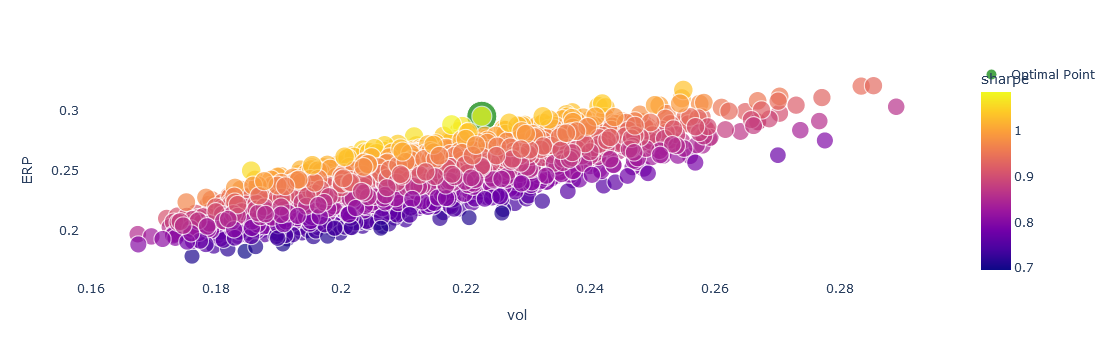

In [339]:
fig = px.scatter(results, x = 'vol', y = 'ERP', color = 'sharpe', size = 'sharpe', hover_data = ['sharpe'] )
fig.add_trace(go.Scatter(x = [sd_sims[sharpe_sims.argmax()]], y = [ERP_sims[sharpe_sims.argmax()]], mode = 'markers', name = 'Optimal Point', marker = dict(size=[30], color = 'green')))
fig.update_layout({'plot_bgcolor': "white"})
fig.show()
